# The Basics - Training Your First Model

The problem we will solve is to `convert from Celsius to Fahrenheit`, where the approximate formula is:
`𝑓=𝑐×1.8+32`

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

%matplotlib inline

print(tf.__version__)
print(tf.keras.__version__)

2.0.0
2.2.4-tf


In [2]:
celsius_q    = np.array([-40, -10,  0,  8, 15, 22,  38],  dtype=float)
fahrenheit_a = np.array([-40,  14, 32, 46, 59, 72, 100],  dtype=float)

for i,c in enumerate(celsius_q):
  print("{:5} degrees Celsius = {:5} degrees Fahrenheit".format(c, fahrenheit_a[i]))

-40.0 degrees Celsius = -40.0 degrees Fahrenheit
-10.0 degrees Celsius =  14.0 degrees Fahrenheit
  0.0 degrees Celsius =  32.0 degrees Fahrenheit
  8.0 degrees Celsius =  46.0 degrees Fahrenheit
 15.0 degrees Celsius =  59.0 degrees Fahrenheit
 22.0 degrees Celsius =  72.0 degrees Fahrenheit
 38.0 degrees Celsius = 100.0 degrees Fahrenheit


## Build the model

In [3]:
layer = tf.keras.layers.Dense(units=1, input_shape=[1])

In [4]:
model = tf.keras.Sequential([layer])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


## Compile the model

In [5]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

## Train the model

In [6]:
history = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")

Finished training the model


## Display the result

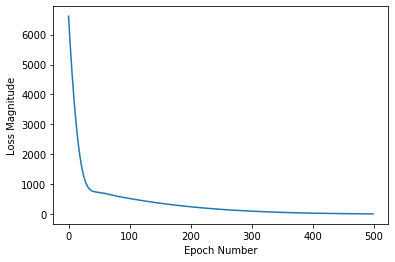

In [7]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

## Predict

The correct answer is 100×1.8+32=212, so our model is doing really well.

In [8]:
print(model.predict([100.0]))

[[211.28845]]


## Looking at the layer weights

formula: `𝑓=1.8𝑐+32.`

In [9]:
print("These are the layer variables: {}".format(layer.get_weights()))

These are the layer variables: [array([[1.827267]], dtype=float32), array([28.561745], dtype=float32)]
